# Unsupervised learning

We will cover the following topics:
- Implementing K-means clustering algorithm from scratch
- Dimensionality reducting using PCA and t-SNE
- Implementing Autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as th
import torchvision as thvis
import torchvision.transforms as T

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from torch import nn
from torch.utils.data import DataLoader

## K-means clustering

- We will implement K-means clustering algorithm **from scratch**.
- We will use toy dataset.

### Data generation

- We create 3 clusters.
- Each cluster contains 100 points in $\mathbb{R}^2$.
- We generate points within each cluster from Gaussian distribution.
- The three cluster differ in the mean and variance.


In [2]:
cluster0 = np.random.multivariate_normal([1, 1], np.eye(2), 100) # Gaussian distribution with mean [1, 1] and variance [[1, 0], [0, 1]]
cluster1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
cluster2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)
cluster0.shape, cluster1.shape, cluster2.shape

((100, 2), (100, 2), (100, 2))

In [3]:
points = np.concatenate([cluster0, cluster1, cluster2], axis=0)
points.shape

(300, 2)

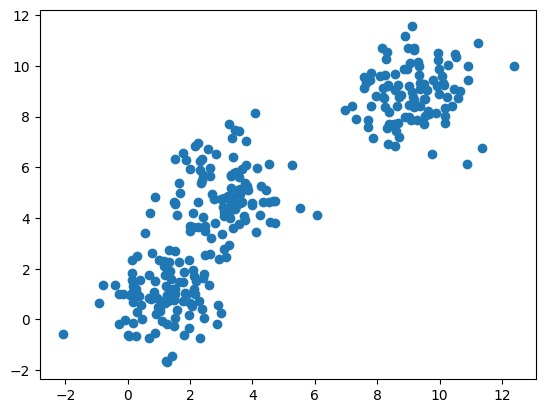

In [4]:
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])

### Algorithm

Repeat the following steps:
- **(Assignment step)** Given $\{\mu_k\}_{k=1,\dots,K}$, find an optimal assignment for each point $\{r_i\}_{i=1,\dots,N}$
$$
\forall i=1,2,\dots,N, \quad r_i = \argmin_{k} \lVert x_i - \mu_k \rVert_2^2
$$
- **(Update step)** Given $\{r_i\}_{i=1,\dots,N}$, find the optimal centroids $\{\mu_k\}_{k=1,\dots,K}$
$$
\forall k=1,2,\dots,K, \quad \mathcal{C}_k = \{ x_i: r_i = k \}, \quad \mu_k = \frac{1}{\lvert \mathcal{C}_k\rvert} \sum_{x\in\mathcal{C}_k} x
$$

In [5]:
K = 3
N = len(points)
f"We will cluster {N} points into {K} clusters."

'We will cluster 300 points into 3 clusters.'

[ 11 201 182]
- We use 11th point ([0.69491361 0.84660886]) as the initial centroid for 0th cluster
- We use 201th point ([8.38926174 8.16422345]) as the initial centroid for 1th cluster
- We use 182th point ([2.04083587 3.64570434]) as the initial centroid for 2th cluster
[[0.69491361 0.84660886]
 [8.38926174 8.16422345]
 [2.04083587 3.64570434]]


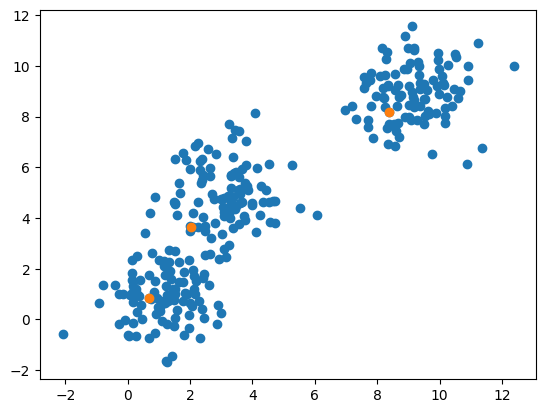

In [6]:
# Initialize centroids
# - We randomlmy sample K=3 points from the data
index = np.random.randint(0, N, K)
print(index)
for k, i in enumerate(index):
  print(f"- We use {i}th point ({points[i]}) as the initial centroid for {k}th cluster")

centroids = points[index, :]
print(centroids)

fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])
ax.scatter(centroids[:, 0], centroids[:, 1])

Implement K-means algorithm. 

Repeat the following steps:
- **(Assignment step)** Given $\{\mu_k\}_{k=1,\dots,K}$, find an optimal assignment for each point $\{r_i\}_{i=1,\dots,N}$
$$
\forall i=1,2,\dots,N, \quad r_i = \argmin_{k} \lVert x_i - \mu_k \rVert_2^2
$$
- **(Update step)** Given $\{r_i\}_{i=1,\dots,N}$, find the optimal centroids $\{\mu_k\}_{k=1,\dots,K}$
$$
\forall k=1,2,\dots,K, \quad \mathcal{C}_k = \{ x_i: r_i = k \}, \quad \mu_k = \frac{1}{\lvert \mathcal{C}_k\rvert} \sum_{x\in\mathcal{C}_k} x
$$

Implementation notes:
- Use `points[i, :]` for $x_i$
- Use `centroides[k, :]` for $\mu_k$
- Use `assignments[i]` for $r_i$
- Use `np.linalg.norm(a - b)` to compute $\lVert a - b \rVert_2$
- You may want to use `np.argmin` function. (https://numpy.org/doc/stable/reference/generated/numpy.argmin.html)

In [7]:
assignments = np.empty((N,))
for _ in range(10):
  # Assignment step
  for i in range(N):
    assignments[i] = """ Change here """
  # Update step
  for k in range(K):
    Ck = """ Change here """
    centroids[k, :] = np.mean(Ck, axis=0)

- Note that we do not care about the indexing of groups in clustering.

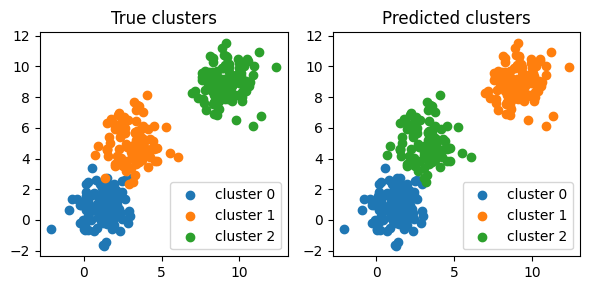

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 3))

ax = axes[0]
ax.scatter(cluster0[:, 0], cluster0[:, 1], label="cluster 0")
ax.scatter(cluster1[:, 0], cluster1[:, 1], label="cluster 1")
ax.scatter(cluster2[:, 0], cluster2[:, 1], label="cluster 2")
ax.set_title("True clusters")
ax.legend()

ax = axes[1]
cluster = points[assignments == 0]
ax.scatter(cluster[:, 0], cluster[:, 1], label="cluster 0")
cluster = points[assignments == 1]
ax.scatter(cluster[:, 0], cluster[:, 1], label="cluster 1")
cluster = points[assignments == 2]
ax.scatter(cluster[:, 0], cluster[:, 1], label="cluster 2")
ax.set_title("Predicted clusters")
ax.legend()

fig.tight_layout()

### K-means clustering with `scikit-learn`

In [9]:
kmeans = KMeans(n_clusters=K, n_init="auto")
kmeans.fit(points)
print(kmeans.labels_.shape)
print(kmeans.labels_)

(300,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


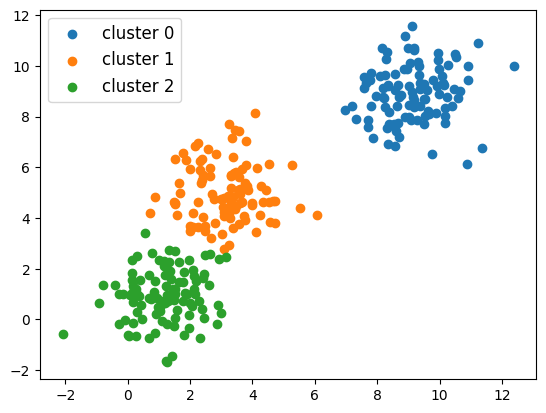

In [10]:
fig, ax = plt.subplots()
cluster = points[kmeans.labels_ == 0]
ax.scatter(cluster[:, 0], cluster[:, 1], label="cluster 0")
cluster = points[kmeans.labels_ == 1]
ax.scatter(cluster[:, 0], cluster[:, 1], label="cluster 1")
cluster = points[kmeans.labels_ == 2]
ax.scatter(cluster[:, 0], cluster[:, 1], label="cluster 2")
ax.legend(fontsize = 12)

## Dimensionality reduction (for visualization)

- PCA
- t-SNE (similarity preserving)

### Data generation

- We use MINIST dataset for visualization.
- Due to the limitation of compuation power and time, we use 10,000 random samples.
  - The original data contain 70,000 images.

In [11]:
dataset = thvis.datasets.MNIST("./data", train=True)
n = len(dataset)
X = np.empty((n, 784), dtype=int)
y = np.empty((n,), dtype=object)
for i, (image, label) in enumerate(dataset):
  X[i, :] = np.array(image).reshape(784)
  y[i] = str(label)

index = np.random.randint(len(y), size=10_000)
X = X[index, :]
y = y[index]

X.shape, y.shape # 784 = 28 * 28

((10000, 784), (10000,))

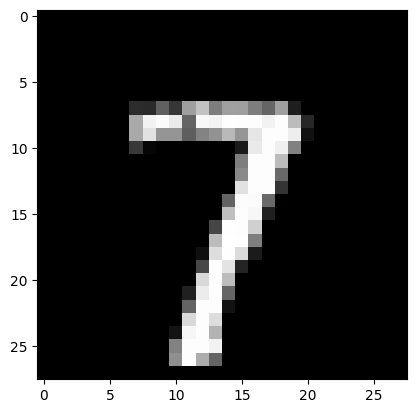

In [12]:
nth = 0
fig, ax = plt.subplots()
ax.imshow(X[nth, :].reshape(28, 28), cmap="gray")

### t-SNE on raw data

Dimensionality reduction from $\mathbb{R}^{784}$ to $\mathbb{R}^2$.

In [13]:
tsne = TSNE(n_components=2).fit_transform(X)
tsne.shape

(10000, 2)

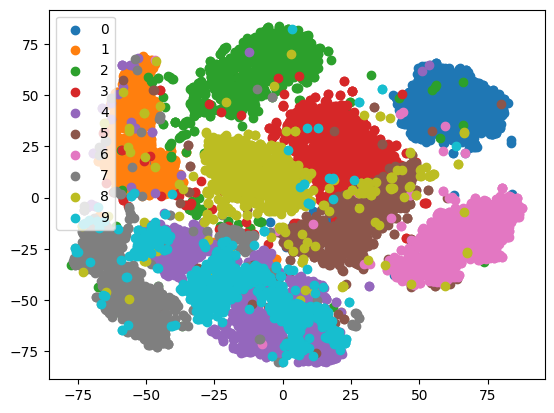

In [14]:
fig, ax = plt.subplots()
for label in np.unique(y):
  points = tsne[y == label]
  ax.scatter(points[:, 0], points[:, 1], label=label)
ax.legend()

### t-SNE with PCA

- The previous approach (i.e., t-SNE on raw data) inevitably leads to high computational costs and may introduce noise from irrelevant features. 
- Therefore, the paper first reduces the MNIST data to 30 dimensions using PCA and then trains the t-SNE.

In [15]:
pca = PCA(n_components=30).fit_transform(X)
print(pca.shape)
tsne = """ Change here """
print(tsne.shape)

(10000, 30)
(10000, 2)


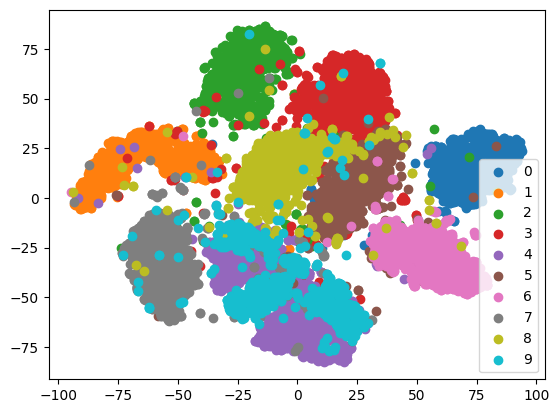

In [16]:
fig, ax = plt.subplots()
for label in np.unique(y):
  points = tsne[y == label]
  ax.scatter(points[:, 0], points[:, 1], label=label)
ax.legend()

## Dimensionality reduction with Autoencoders

- So far, we have learned about dimensionality reduction for data visualization.
- For data visualization, we focus on preserving similarity.
- What we need for data "compression", rather than "visualization"?
  - For data compression, we need to preserve information, rather than similarity.
  - If $z=f(x)$ caputers most information about the data $x$, then we should be able to **reconstruct** the data $x$ from $z$.

In [17]:
num_workers = 0
batch_size = 20

transform = T.ToTensor()
train_dataset = thvis.datasets.MNIST(root='data', train=True,
                                     download=True, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers)

test_dataset = thvis.datasets.MNIST(root='data', train=False,
                                    download=True, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers)

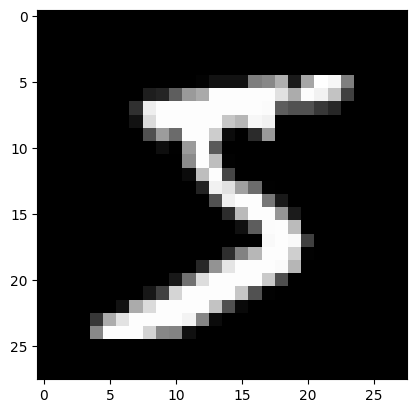

In [18]:
fig, ax = plt.subplots()
ax.imshow(train_dataset[0][0].numpy()[0, ...], cmap="gray")

### Autoencoder

- Let's encode images of high dimension to vectors in $\mathbb{R}^{32}$.

In [19]:
class Autoencoder(nn.Module):

  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()

    ## encoder ##
    self.encoder = """ Change here """
    ## decoder ##
    self.decoder = """ Change here """

  def forward(self, x):
    return self.decoder(self.encoder(x))

encoding_dim = 64
model = Autoencoder(encoding_dim)
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=784, bias=True)
    (1): Sigmoid()
  )
)

In [20]:
n_epochs = 20 # We train the model with 20 epochs
criterion = """ Change here """ # We use mean-squared loss function
optimizer = """ Change here """ # We use Adam optimizer with learning rate 0.001

for epoch in range(1, n_epochs + 1):
  # Monitor training loss
  train_loss = 0.0
  
  for (images, _) in train_dataloader:
    optimizer.zero_grad()

    # The shape of `images` is (B, 1, 28, 28)
    # We expect points of dimensionality 784=28*28 .
    images = """ Change here """

    # Encode and then decode images.
    outputs = """ Change here """

    # Compute loss.
    loss = criterion(outputs, images)

    # Optimize.
    loss.backward()
    optimizer.step()

    # Update stats
    train_loss += loss.item() * images.size(0)
          
  # Log training stats
  train_loss = train_loss / len(train_dataloader)
  print(f"Epoch [{epoch}/{n_epochs}] loss={train_loss:.6f}")

Epoch [1/20] loss=0.492067
Epoch [2/20] loss=0.165441
Epoch [3/20] loss=0.131876
Epoch [4/20] loss=0.125099
Epoch [5/20] loss=0.122146
Epoch [6/20] loss=0.120368
Epoch [7/20] loss=0.118949
Epoch [8/20] loss=0.117883
Epoch [9/20] loss=0.117077
Epoch [10/20] loss=0.116456
Epoch [11/20] loss=0.115976
Epoch [12/20] loss=0.115577
Epoch [13/20] loss=0.115241
Epoch [14/20] loss=0.114934
Epoch [15/20] loss=0.114665
Epoch [16/20] loss=0.114410
Epoch [17/20] loss=0.114190
Epoch [18/20] loss=0.114006
Epoch [19/20] loss=0.113834
Epoch [20/20] loss=0.113673


- Original images vs. Reconstructed images

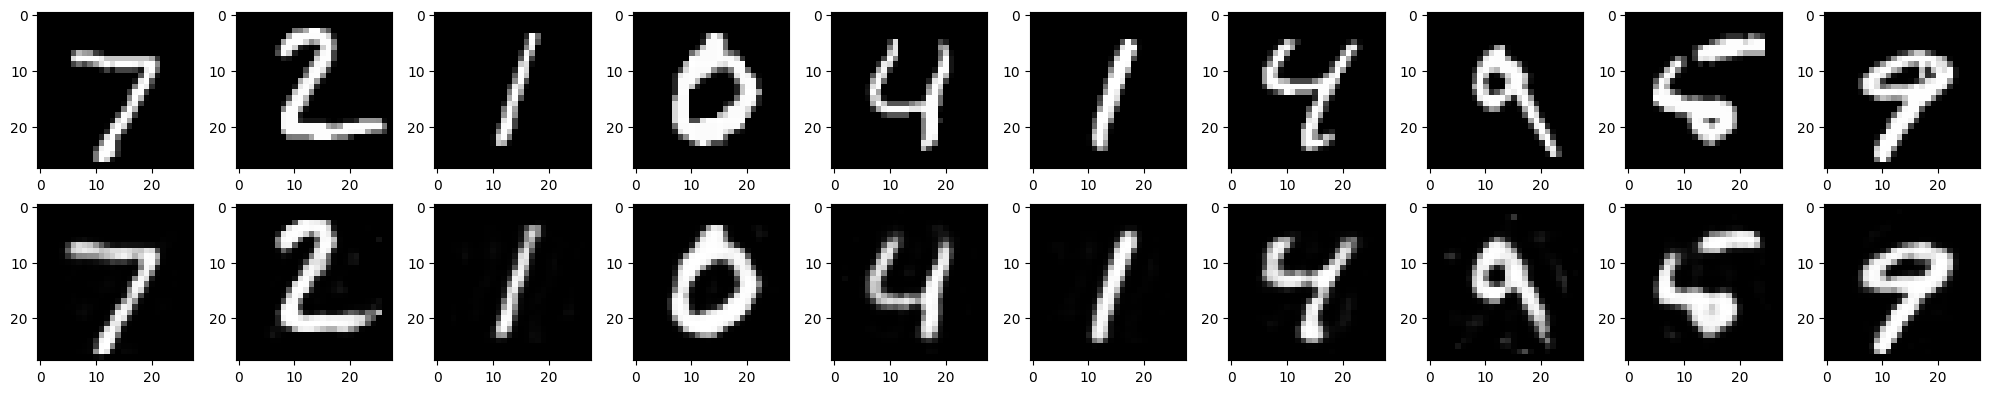

In [21]:
# Obtain one batch of test images.
images, labels = next(iter(test_dataloader))
images_flatten = images.view(images.size(0), -1)
images = images.numpy()

# Get sample outputs
outputs = model(images_flatten)
outputs = outputs.view(batch_size, 1, 28, 28)
outputs = outputs.detach().numpy()

fig, axes = plt.subplots(nrows=2, 
                         ncols=10, 
                         figsize=(20, 4))
for images, row in zip([images, outputs], axes):
  for img, ax in zip(images, row):
    ax.imshow(np.squeeze(img), cmap="gray")
fig.tight_layout()

- Latent space visualization

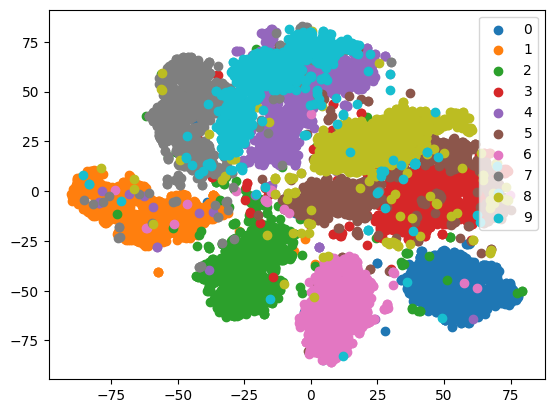

In [22]:
# Obtain all test images.
images, labels = [], []
for (x, y) in test_dataloader:
  images.append(x)
  labels.append(y)

images = th.cat(images, axis=0)
labels = th.cat(labels, axis=0)
images_flatten = images.view(images.size(0), -1)
encodings = model.encoder(images_flatten).detach().numpy()

# Now we have 64-dimensional encodings.
# We want to visualize these encodings in 2-dimensional space.
# Use t-SNE.
encodings = """ Change here """
assert encodings.shape[-1] == 2 # 2-dimensional encodings

# Vis.
fig, ax = plt.subplots()
for y in np.unique(labels):
  points = encodings[labels == y]
  ax.scatter(points[:, 0], points[:, 1], label=y)
ax.legend()

- What if we encode images into 2-dimensional space?

In [23]:
encoding_dim = 2
model = Autoencoder(encoding_dim)
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=2, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=784, bias=True)
    (1): Sigmoid()
  )
)

In [24]:
"""
Write codes to train the autoencoder `model`
You may want to copy-paste the above codes, but please first attempt to write from scratch.
"""

Epoch [1/20] loss=1.556274
Epoch [2/20] loss=1.264366
Epoch [3/20] loss=1.206722
Epoch [4/20] loss=1.155915
Epoch [5/20] loss=1.134917
Epoch [6/20] loss=1.124022
Epoch [7/20] loss=1.117718
Epoch [8/20] loss=1.114435
Epoch [9/20] loss=1.112652
Epoch [10/20] loss=1.111625
Epoch [11/20] loss=1.111022
Epoch [12/20] loss=1.110633
Epoch [13/20] loss=1.110383
Epoch [14/20] loss=1.110206
Epoch [15/20] loss=1.110076
Epoch [16/20] loss=1.109981
Epoch [17/20] loss=1.109913
Epoch [18/20] loss=1.109849
Epoch [19/20] loss=1.109797
Epoch [20/20] loss=1.109754


- We cannot compress images in $\mathbb{R}^{784}$ into vectors in $\mathbb{R}^2$.
- $\mathbb{R}^2$ is too narrow.

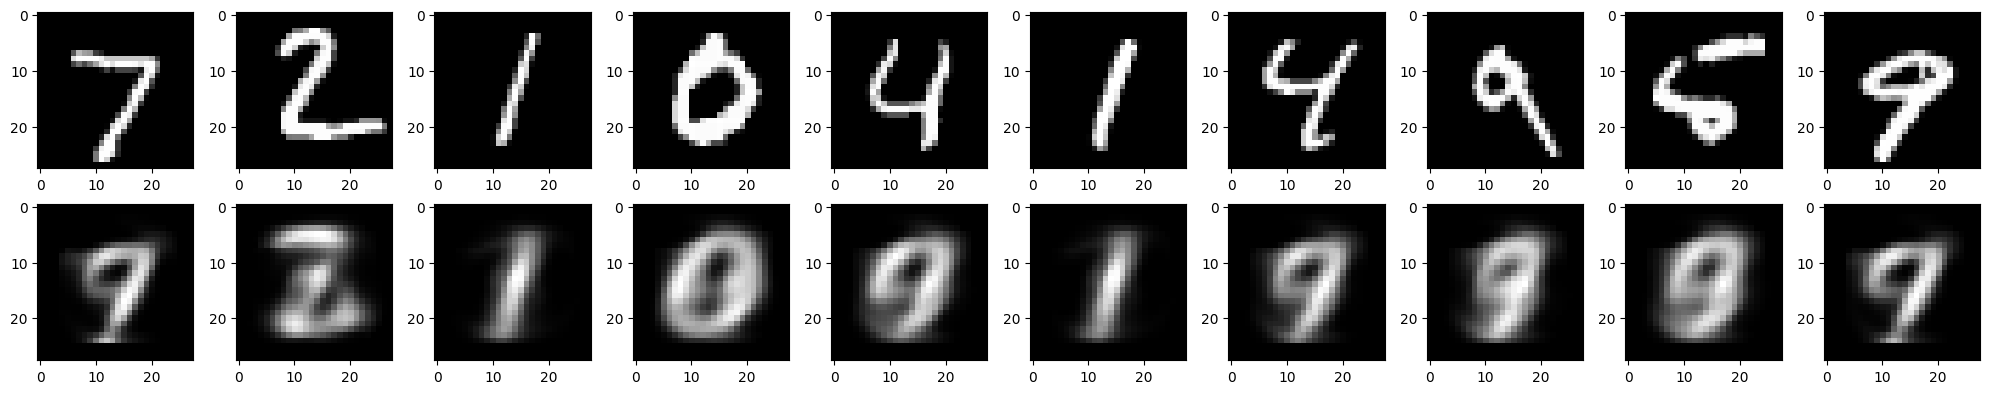

In [25]:
# Obtain one batch of test images.
images, labels = next(iter(test_dataloader))
images_flatten = images.view(images.size(0), -1)
images = images.numpy()

# Get sample outputs
outputs = model(images_flatten)
outputs = outputs.view(batch_size, 1, 28, 28)
outputs = outputs.detach().numpy()

fig, axes = plt.subplots(nrows=2, 
                         ncols=10, 
                         figsize=(20, 4))
for images, row in zip([images, outputs], axes):
  for img, ax in zip(images, row):
    ax.imshow(np.squeeze(img), cmap="gray")
fig.tight_layout()

- Autoencoder is dimensionality reduction technique for data compression, not for visualization.

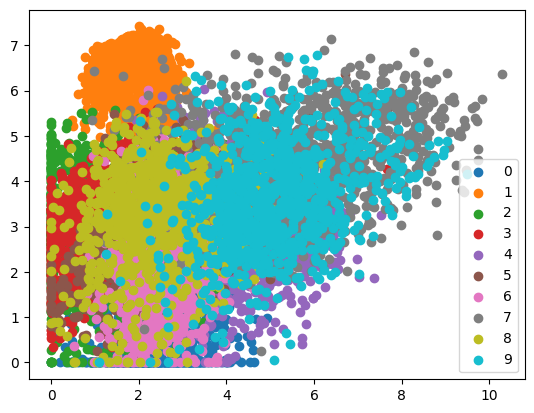

In [26]:
# Obtain all test images.
images, labels = [], []
for (x, y) in test_dataloader:
  images.append(x)
  labels.append(y)

images = th.cat(images, axis=0)
labels = th.cat(labels, axis=0)
images_flatten = images.view(images.size(0), -1)
encodings = model.encoder(images_flatten).detach().numpy()
assert encodings.shape[-1] == 2 # 2-dimensional encodings

# Vis.
fig, ax = plt.subplots()
for y in np.unique(labels):
  points = encodings[labels == y]
  ax.scatter(points[:, 0], points[:, 1], label=y)
ax.legend()